#  EagleEye_v7 tutorial


We import necessary libraries and set up custom plot configurations for consistency.

In [23]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directory setup for custom modules
import sys
module_path = '../../eagleeye'
sys.path.append(module_path)
import EagleEye_v17
from utils_EE_v17 import compute_the_null, partitioning_function

# Custom plotting settings
sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.titlesize': 21,
    'axes.labelsize': 17,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 17,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': 'silver'
})


## 1. Generate the datasets 

In [ ]:
from utils_37 import generate_uniform_with_Gaussian_ove_under

# Generate data with anomalies
num_points = 50000
anomaly_sizes_o = [50, 100, 200, 300, 500, 700, 900]
anomaly_sizes_u = [100, 300, 700, ]
n_dim = 3

#reference_data, test_data = generate_uniform_with_Gaussian_ove_under(n_dim, num_points, anomaly_sizes_o, anomaly_sizes_u)
X = np.load('reference_data.npy')
Y = np.load('test_data.npy')

In [3]:
#np.save('reference_data.npy',reference_data)
#np.save('test_data.npy',test_data)

### 1.1 Visualize the generated datasets 

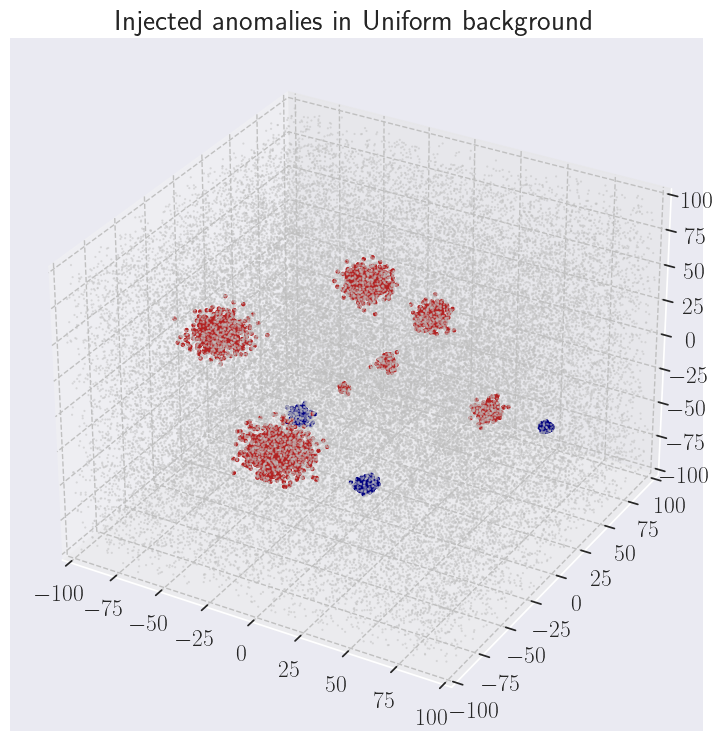

In [25]:
from utils_37 import plot_injected_anomalies_in_uniform_background

# plot of the generated dataset. In silver the background only
# in red the injected overdensities and in blue the injected underdensities
plot_injected_anomalies_in_uniform_background(X, anomaly_sizes_u, Y, anomaly_sizes_o)

## 2. EagleEye_v17

### 2.1 Flagging of putative anomalous points 

### 2.2 Pruning via iterative density equalization (IDE)

Reference dataset: $\mathbf{X}$

Test dataset:      $\mathbf{Y}$ 



In [26]:
#%% EagleEye hyperparameters

p       = len(Y)/(len(Y)+len(X))

K_M     = 500

p_ext   = 1e-5

n_jobs  = 10

In [27]:
stats_null                     = compute_the_null(p=p, K_M=K_M)

In [28]:
#%% Eagle Soar!
import time
t = time.time()
result_dict, stats_null = EagleEye_v17.Soar(X, Y, K_M=K_M, p_ext=p_ext, n_jobs=n_jobs, stats_null=stats_null, result_dict_in={})
elapsed17alt = time.time() - t
print(f'Elapsed time: {elapsed17alt} seconds')


-----------------------------------------------------------------
Eagle...Soar!
-----------------------------------------------------------------
Compute the nearest neighbours
KNN completed: 0.00 %
KNN completed: 10.00 %
KNN completed: 20.00 %
KNN completed: 30.00 %
KNN completed: 40.00 %
KNN completed: 50.00 %
KNN completed: 60.00 %
KNN completed: 70.00 %
KNN completed: 80.00 %
KNN completed: 90.00 %
-----------------------------------------------------------------
Flagging of putative anomalous points
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

-----------------------------------------------------------------
Pruning via iterative density equalization (IDE)
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

Elapsed time: 131.09090375900269 seconds


### 2.3 Repˆechage 

In [29]:
#%% Cluter the Putative anomalies

clusters = partitioning_function(X,Y,result_dict,p_ext=p_ext,Z=2.65 )

#%% Repêchage

EE_book = EagleEye_v17.Repechage(X,Y,result_dict,clusters,p_ext=1e-5)

-----------------------------------------------------------------
Clustering
-----------------------------------------------------------------
-----------------------------------------------------------------
Repêchage
-----------------------------------------------------------------


<IPython.core.display.Math object>

alpha = 1
alpha = 2
alpha = 3
alpha = 4
alpha = 5
alpha = 6
alpha = 7


'DONE!'

<IPython.core.display.Math object>

alpha = 1
alpha = 2
alpha = 3


'DONE!'

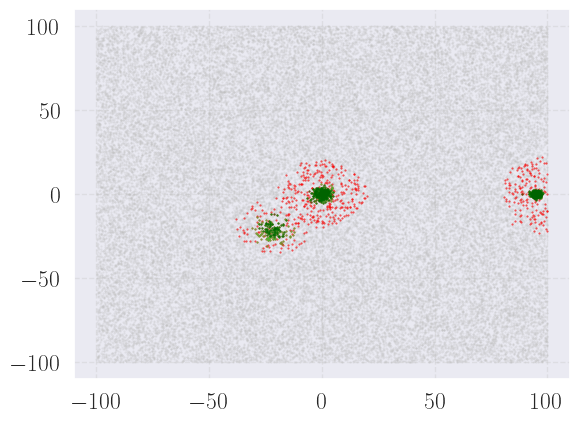

In [30]:
cont = (np.array(anomaly_sizes_o).sum()).astype(int)
fig = plt.figure(1)
plt.scatter(X[:-cont,0], X[:-cont,1], marker='.', s=1, c='silver', alpha=0.3)
for jj in range(3):
    Putative   = EE_book['X_OVER_clusters'][jj]['Putative']
    Pruned     = EE_book['X_OVER_clusters'][jj]['Pruned']
    Repechaged = EE_book['X_OVER_clusters'][jj]['Repechaged']
    Background = EE_book['X_OVER_clusters'][jj]['Background']
    
    # Plotting the scatterplots

    plt.scatter(X[Putative,0], X[Putative,1], marker='.', s=1, c='red', alpha=0.7)
    plt.scatter(X[Repechaged,0], X[Repechaged,1], marker='.', s=1, c='limegreen', alpha=0.7)
    plt.scatter(X[Pruned,0], X[Pruned,1], marker='.', s=1, c='darkgreen', alpha=0.7)

# Displaying the combined plot
plt.show()


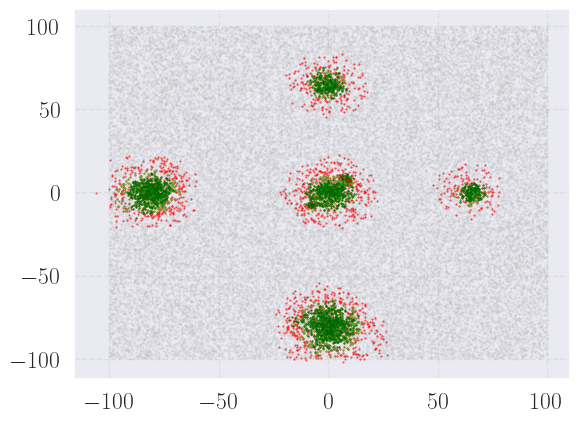

In [31]:
cont = (np.array(anomaly_sizes_o).sum()).astype(int)
fig = plt.figure(2)
plt.scatter(Y[:-cont,0], Y[:-cont,1], marker='.', s=1, c='silver', alpha=0.3)
for jj in range(7):
    Putative   = EE_book['Y_OVER_clusters'][jj]['Putative']
    Pruned     = EE_book['Y_OVER_clusters'][jj]['Pruned']
    Repechaged = EE_book['Y_OVER_clusters'][jj]['Repechaged']
    Background = EE_book['Y_OVER_clusters'][jj]['Background']
    cont = 3000

    # Plotting the scatterplots
    
    plt.scatter(Y[Putative,0], Y[Putative,1], marker='.', s=1, c='red', alpha=0.7)
    plt.scatter(Y[Repechaged,0], Y[Repechaged,1], marker='.', s=1, c='limegreen', alpha=0.7)
    plt.scatter(Y[Pruned,0], Y[Pruned,1], marker='.', s=1, c='darkgreen', alpha=0.7)

# Displaying the combined plot
plt.show()



#### Structure of the dictionary containing the results
    EE_book = {
    "Y_OVER_clusters": {
        i: {"Putative": None, "Pruned": None, "Repechaged": None, "Background": None}
        for i in range(len(clusters_plus))
    },
    "X_OVER_clusters": {
        i: {"Putative": None, "Pruned": None, "Repechaged": None, "Background": None}
        for i in range(len(clusters_minus))
    }
    }   

### 2.4 Get Upsilon_i of the equalized sets

In [ ]:
# Create a set of banned indices from all clusters
banned_Y = {
    pruned_index
    for cluster in EE_book['Y_OVER_clusters'].values()
    if cluster['Pruned'] is not None  # Check if there's a pruned list
    for pruned_index in cluster['Pruned']
}

# Now create equalized_Y by including indices that are not banned
equalized_Y = [x for x in range(Y.shape[0]) if x not in banned_Y]

equalized_neighbors = result_dict['Knn_model'].kneighbors(Y[equalized_Y, :])[1]

nx = X.shape[0]
mask = ~np.isin(equalized_neighbors, [x + nx for x in banned_Y])

filtered_equalized_neighbors = np.empty((equalized_neighbors.shape[0], K_M), dtype=int)
for i in range(equalized_neighbors.shape[0]):
    # Apply the mask for the current row to filter out banned entries
    valid_neighbors = equalized_neighbors[i, :][mask[i, :]]
    # Optionally, handle cases where there are fewer than K_M valid neighbors
    if valid_neighbors.size < K_M:
        raise ValueError(f"Row {i} does not have enough valid neighbors.")
    # Take the first K_M valid neighbors for the current row
    filtered_equalized_neighbors[i, :] = valid_neighbors[:K_M]

binary_seq                     = (filtered_equalized_neighbors > nx).astype(int)
from EagleEye_v17 import PValueCalculator
KSTAR_RANGE = range(20,K_M)
p_val_info_eq                  = PValueCalculator(binary_seq, KSTAR_RANGE, p=p)
Upsilon_i_equalized_Y = p_val_info_eq.min_pval_plus

In [ ]:
# Create a set of banned indices from all clusters
banned_X = {
    pruned_index
    for cluster in EE_book['X_OVER_clusters'].values()
    if cluster['Pruned'] is not None  # Check if there's a pruned list
    for pruned_index in cluster['Pruned']
}

# Now create equalized_Y by including indices that are not banned
equalized_X = [x for x in range(X.shape[0]) if x not in banned_X]

equalized_neighbors = result_dict['Knn_model'].kneighbors(X[equalized_X, :])[1]

nx = X.shape[0]
mask = ~np.isin(equalized_neighbors, [x for x in banned_X])

filtered_equalized_neighbors = np.empty((equalized_neighbors.shape[0], K_M), dtype=int)
for i in range(equalized_neighbors.shape[0]):
    # Apply the mask for the current row to filter out banned entries
    valid_neighbors = equalized_neighbors[i, :][mask[i, :]]
    # Optionally, handle cases where there are fewer than K_M valid neighbors
    if valid_neighbors.size < K_M:
        raise ValueError(f"Row {i} does not have enough valid neighbors.")
    # Take the first K_M valid neighbors for the current row
    filtered_equalized_neighbors[i, :] = valid_neighbors[:K_M]

binary_seq                     = (~(filtered_equalized_neighbors > nx)).astype(int)
from EagleEye_v17 import PValueCalculator
KSTAR_RANGE = range(20,K_M)
p_val_info_eq                  = PValueCalculator(binary_seq, KSTAR_RANGE, p=p)
Upsilon_i_equalized_X = p_val_info_eq.min_pval_plus

## 3 Results visualization

In [ ]:
import visualization_utils_EE_v17
import importlib
importlib.reload(visualization_utils_EE_v17)
from visualization_utils_EE_v17 import plot_37_article


In [ ]:
plot_37_article(
    EE_book,
    result_dict,
    X,
    Y,
    p,
    anomaly_sizes_u,
    anomaly_sizes_o,
    Upsilon_i_equalized_Y,
    Upsilon_i_equalized_X,
    'Fig2.png'
)

In [35]:
from visualization_utils_EE_v17 import generate_anomaly_table

In [36]:
combined_df = generate_anomaly_table(EE_book, clusters)

,$\mathcal{Y_{\alpha=0}}$,$\mathcal{Y_{\alpha=1}}$,$\mathcal{Y_{\alpha=2}}$,$\mathcal{Y_{\alpha=3}}$,$\mathcal{Y_{\alpha=4}}$,$\mathcal{Y_{\alpha=5}}$,$\mathcal{Y_{\alpha=6}}$,$\mathcal{X_{\alpha=0}}$,$\mathcal{X_{\alpha=1}}$,$\mathcal{X_{\alpha=2}}$
Added set:,50 (50),100 (100),200 (200),300 (300),500 (500),700 (700),900 (900),100 (100),300 (300),700 (700)
Flagged: $\mathcal{Y}^+$ or $\mathcal{X}^+$,89 (50),166 (100),324 (200),499 (300),766 (500),1010 (699),1312 (897),224 (100),606 (300),861 (700)
Pruned: $\hat{\mathcal{Y}}^+$ or $\hat{\mathcal{X}}^+$,52 (50),69 (68),153 (149),234 (217),374 (350),519 (481),684 (615),88 (72),295 (290),702 (699)
Repechage: $\mathcal{Y}_{\alpha}^{anom}$ or $\mathcal{X}_{\alpha}^{anom}$,59 (50),91 (90),193 (184),300 (275),482 (443),667 (598),894 (771),142 (99),306 (299),697 (696)
Injected: $\mathcal{Y}_{\alpha}^{inj}$ or $\mathcal{X}_{\alpha}^{inj}$,9 (0),5 (0),12 (0),22 (0),47 (0),73 (0),114 (0),18 (0),6 (0),4 (0)


<IPython.core.display.Javascript object>

### Signal Purity estimates (Eqn. 8)

In [ ]:
EagleEye_v17.S_SB_estimate_Y_overdensities(result_dict,EE_book)


{'Purity': {'Total': 0.8971575214926374,
  0: 0.8714378524038755,
  1: 0.9366391631035966,
  2: 0.8442361966538288,
  3: 0.9439136964435952,
  4: 0.9253908480697809,
  5: 0.9010722724617987,
  6: 0.889288321187459},
 'Upsilon_alpha_plus': {0: 93.28850548421076,
  1: 67.56140296758115,
  2: 23.9884289092928,
  3: 38.12848641207295,
  4: 87.12775755971353,
  5: 96.31904834257371,
  6: 103.87050962624033}}

In [ ]:
EagleEye_v17.S_SB_estimate_X_overdensities(result_dict,EE_book)

{'Purity': {'Total': 0.9750354863301872,
  0: 0.8679563134835309,
  1: 0.9796596505658508,
  2: 0.9940954742459259},
 'Upsilon_alpha_minus': {0: 29.442447003287725,
  1: 151.24272120043787,
  2: 329.0343641530589}}